In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../cleaned-data/cleaned/contracts.csv', encoding='iso-8859-1', sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28685139 entries, 0 to 28685138
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   COCO    object
 1   COMAX   object
 2   COPRO   int64 
dtypes: int64(1), object(2)
memory usage: 656.6+ MB


In [5]:
# how many each product was bought, for each contract
df = df.groupby('COMAX')['COPRO'].value_counts()

In [6]:
df = pd.DataFrame(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5270830 entries, ('00000226d8', 812) to ('ffffd39fd9', 4545)
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   COPRO   int64
dtypes: int64(1)
memory usage: 70.2+ MB


In [8]:
df.head()

COPRO
COMAX      COPRO       
00000226d8 812       14
           1          1
           727        1
           954        1
           4545       1

In [9]:
df.index

MultiIndex([('00000226d8',  812),
            ('00000226d8',    1),
            ('00000226d8',  727),
            ('00000226d8',  954),
            ('00000226d8', 4545),
            ('00005d4463',    3),
            ('00005d4463',   53),
            ('00005d4463',  137),
            ('00005d4463',  812),
            ('000093046d',  160),
            ...
            ('ffffd39fd9',  812),
            ('ffffd39fd9',   53),
            ('ffffd39fd9',   65),
            ('ffffd39fd9',    3),
            ('ffffd39fd9',  100),
            ('ffffd39fd9',  160),
            ('ffffd39fd9',  753),
            ('ffffd39fd9',  780),
            ('ffffd39fd9',  954),
            ('ffffd39fd9', 4545)],
           names=['COMAX', 'COPRO'], length=5270830)

In [10]:
df.values

array([[14],
       [ 1],
       [ 1],
       ...,
       [ 1],
       [ 1],
       [ 1]])

## Lokking to transpose the data to calculate the PCA values, but couldn't do it in direct way, therefore I had to do all the following JOB

In [11]:
# seperate the data
COMAX, COPRO = [i[0] for i in df.index], [i[1] for i in df.index]
COUNTS = [i[0] for i in df.values]

# get the list of the products
PRODUCTS = set(COPRO)

In [12]:
group = list(zip(COMAX, COPRO, COUNTS))

In [14]:
group[:10]

[('00000226d8', 812, 14),
 ('00000226d8', 1, 1),
 ('00000226d8', 727, 1),
 ('00000226d8', 954, 1),
 ('00000226d8', 4545, 1),
 ('00005d4463', 3, 1),
 ('00005d4463', 53, 1),
 ('00005d4463', 137, 1),
 ('00005d4463', 812, 1),
 ('000093046d', 160, 1)]

In [15]:
# Make it a data row look a like
def clit(group):
    lol = len(group)
    count = 1
    out = dict()
    
    curr = group[0][0]
    out[curr] = [list(group[0][1:])]
    
    while count < lol:
        if group[count][0] == curr:
            out[curr].append(list(group[count][1:]))
        else:
            curr = group[count][0]
            out[curr] = [list(group[count][1:])]
            
        count += 1
    
    return out

In [16]:
out = clit(group)
out['00000226d8']

[[812, 14], [1, 1], [727, 1], [954, 1], [4545, 1]]

In [17]:
# compelete the data about the missing products, aka their value is equal to 0
def complete(out, PRODUCTS):
    for key in out.keys():
        local = [i[0] for i in out[key]]
        nice = [i for i in PRODUCTS if i not in local]

        for i in nice:
            out[key].append([i, 0])

    return out

In [18]:
# The work is done
out = complete(out, PRODUCTS)
out['00000226d8']

[[812, 14],
 [1, 1],
 [727, 1],
 [954, 1],
 [4545, 1],
 [384, 0],
 [3, 0],
 [646, 0],
 [647, 0],
 [8, 0],
 [137, 0],
 [780, 0],
 [658, 0],
 [1556, 0],
 [411, 0],
 [2076, 0],
 [542, 0],
 [160, 0],
 [807, 0],
 [2350, 0],
 [7604, 0],
 [53, 0],
 [52, 0],
 [823, 0],
 [820, 0],
 [65, 0],
 [2114, 0],
 [1752, 0],
 [600, 0],
 [1759, 0],
 [97, 0],
 [867, 0],
 [100, 0],
 [7652, 0],
 [7530, 0],
 [7532, 0],
 [753, 0]]

In [19]:
# to insure we've the same products order, we'll sort the lists
def sort_out(out):
    for key in out.keys():
        out[key].sort(key=lambda x: x[0])

    return out

In [20]:
# Done
out = sort_out(out)
out['00000226d8']

[[1, 1],
 [3, 0],
 [8, 0],
 [52, 0],
 [53, 0],
 [65, 0],
 [97, 0],
 [100, 0],
 [137, 0],
 [160, 0],
 [384, 0],
 [411, 0],
 [542, 0],
 [600, 0],
 [646, 0],
 [647, 0],
 [658, 0],
 [727, 1],
 [753, 0],
 [780, 0],
 [807, 0],
 [812, 14],
 [820, 0],
 [823, 0],
 [867, 0],
 [954, 1],
 [1556, 0],
 [1752, 0],
 [1759, 0],
 [2076, 0],
 [2114, 0],
 [2350, 0],
 [4545, 1],
 [7530, 0],
 [7532, 0],
 [7604, 0],
 [7652, 0]]

In [21]:
# convert the products numbers to str
def prod_to_str(out):
    for key in out.keys():
        for new in out[key]:
            lol = str(new[0])
            new[0] = '0'*(5 - len(lol)) + lol
        
    return out

In [22]:
# Done
out = prod_to_str(out)
out['00000226d8']

[['00001', 1],
 ['00003', 0],
 ['00008', 0],
 ['00052', 0],
 ['00053', 0],
 ['00065', 0],
 ['00097', 0],
 ['00100', 0],
 ['00137', 0],
 ['00160', 0],
 ['00384', 0],
 ['00411', 0],
 ['00542', 0],
 ['00600', 0],
 ['00646', 0],
 ['00647', 0],
 ['00658', 0],
 ['00727', 1],
 ['00753', 0],
 ['00780', 0],
 ['00807', 0],
 ['00812', 14],
 ['00820', 0],
 ['00823', 0],
 ['00867', 0],
 ['00954', 1],
 ['01556', 0],
 ['01752', 0],
 ['01759', 0],
 ['02076', 0],
 ['02114', 0],
 ['02350', 0],
 ['04545', 1],
 ['07530', 0],
 ['07532', 0],
 ['07604', 0],
 ['07652', 0]]

## Now reassemnling the data but the products as colums as well

In [23]:
# Get the keys
COMAX_ = list(out.keys())
COMAX_[0], COMAX_[-1]

('00000226d8', 'ffffd39fd9')

In [24]:
# Products, already converted them to strings
PRODUCTS = [i[0] for i in out['00000226d8']]

In [25]:
data = dict()
data['COMAX'] = COMAX_
for i in PRODUCTS:
    data[i] = list()

In [26]:
data.keys()

dict_keys(['COMAX', '00001', '00003', '00008', '00052', '00053', '00065', '00097', '00100', '00137', '00160', '00384', '00411', '00542', '00600', '00646', '00647', '00658', '00727', '00753', '00780', '00807', '00812', '00820', '00823', '00867', '00954', '01556', '01752', '01759', '02076', '02114', '02350', '04545', '07530', '07532', '07604', '07652'])

In [27]:
# reassamble all the products values
def done(data, out):
    for key in out.keys():
        for val in out[key]:
            data[val[0]].append(val[1])
        
    return data

In [28]:
data = done(data, out)

In [29]:
data = pd.DataFrame(data)

In [30]:
del out

In [31]:
data.head()

,COMAX,00001,00003,00008,00052,00053,00065,00097,00100,00137,...,01752,01759,02076,02114,02350,04545,07530,07532,07604,07652
0,00000226d8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,00005d4463,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,000093046d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0000b441aa,0,0,0,0,1,3,0,1,1,...,0,0,20,0,0,0,0,0,0,0
4,0000cf2c88,0,2,0,0,6,3,2,2,3,...,2,2,19,2,0,2,3,0,0,2


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637143 entries, 0 to 637142
Data columns (total 38 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   COMAX   637143 non-null  object
 1   00001   637143 non-null  int64 
 2   00003   637143 non-null  int64 
 3   00008   637143 non-null  int64 
 4   00052   637143 non-null  int64 
 5   00053   637143 non-null  int64 
 6   00065   637143 non-null  int64 
 7   00097   637143 non-null  int64 
 8   00100   637143 non-null  int64 
 9   00137   637143 non-null  int64 
 10  00160   637143 non-null  int64 
 11  00384   637143 non-null  int64 
 12  00411   637143 non-null  int64 
 13  00542   637143 non-null  int64 
 14  00600   637143 non-null  int64 
 15  00646   637143 non-null  int64 
 16  00647   637143 non-null  int64 
 17  00658   637143 non-null  int64 
 18  00727   637143 non-null  int64 
 19  00753   637143 non-null  int64 
 20  00780   637143 non-null  int64 
 21  00807   637143 non-null  int64 
 

In [33]:
data.shape

(637143, 38)

In [34]:
len(PRODUCTS)

37

## Pour avoir deduire le nombre de PCA a prendre

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [36]:
x = data.loc[:, PRODUCTS].values

In [37]:
x = StandardScaler().fit_transform(x)

In [38]:
pca = PCA().fit(x)

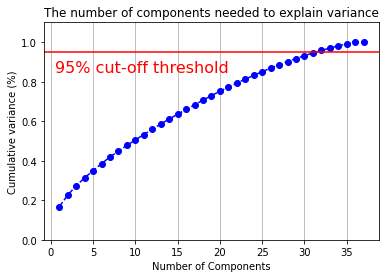

In [39]:
fig, ax = plt.subplots()
xi = np.arange(1, len(PRODUCTS) + 1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [40]:
# in our case we need to take 31 component
pca = PCA(n_components = 37)

In [41]:
principalComponents = pca.fit_transform(x)

In [42]:
# since we have 10 products we already know that it will be 10 PCA
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA-{}'.format(i) for i in range(1, 38)])

In [43]:
principalDf

,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5,PCA-6,PCA-7,PCA-8,PCA-9,PCA-10,...,PCA-28,PCA-29,PCA-30,PCA-31,PCA-32,PCA-33,PCA-34,PCA-35,PCA-36,PCA-37
0,-1.979298,0.605037,-0.347049,0.343918,-0.206917,0.643579,-0.722953,-0.453402,0.484396,-0.740923,...,-0.029735,-0.666880,0.062032,-0.134632,-0.175090,-0.333600,0.024415,-0.320194,0.433301,-0.001820
1,-2.052425,-0.648610,0.189774,-0.327968,-0.019448,-0.042553,0.420590,0.100898,-0.456490,-0.054549,...,0.110073,-0.097745,0.071935,0.142639,-0.163173,0.094262,0.016538,-0.077903,-0.045103,0.006125
2,-2.335974,-0.513563,0.431780,0.370108,0.025497,-0.453942,-0.293095,-0.077861,-0.052114,0.280156,...,-0.092531,0.234044,-0.124102,0.032151,0.098365,0.040162,0.290416,-0.044333,-0.134802,0.002664
3,0.312545,0.396290,-0.779005,0.480261,0.802417,0.197184,1.107524,0.584352,0.544424,0.597105,...,0.049952,-0.465177,0.659723,0.847133,0.138849,-0.397856,-0.682668,0.597681,-0.232180,0.002856
4,8.031301,-2.713182,-2.302506,-0.975854,-1.239608,1.045468,-1.029064,-0.674694,-1.293753,0.053422,...,1.848692,-0.716391,-0.486786,0.664928,-0.858845,-0.287044,1.450142,0.974145,-0.336388,0.056297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637138,-2.204475,-0.775799,0.456335,-0.644344,0.366521,0.409165,0.517144,-0.008711,0.122222,0.075493,...,0.098914,0.035867,0.095267,0.227304,-0.128781,0.257412,0.067448,0.015800,-0.003392,0.008711
637139,-0.871428,0.109891,-0.180886,-0.232207,-0.650174,-0.496100,0.869816,-0.768508,0.378887,0.772791,...,-1.715341,0.435600,0.970664,-0.377949,-0.440392,0.574817,-0.222649,0.264514,0.544728,-0.005831
637140,-0.639298,0.708808,-0.050029,-0.671916,0.301778,1.822625,-0.183348,0.290658,-1.484381,0.892104,...,-0.119729,1.406435,0.296981,-0.790756,-0.571292,0.699769,0.019635,0.227118,0.751543,-0.006487
637141,-1.990395,-0.262848,-0.051782,0.132415,-0.161952,-0.431059,-0.041055,0.134718,0.367602,0.225280,...,-0.135671,0.220485,0.074937,-0.084012,-0.017776,0.066736,0.218513,0.129325,0.776355,0.000911


In [44]:
#principalDf['COMAX'] = data['COMAX']
principalDf.insert(0, 'COMAX', data['COMAX'], True)

In [45]:
principalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637143 entries, 0 to 637142
Data columns (total 38 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   COMAX   637143 non-null  object 
 1   PCA-1   637143 non-null  float64
 2   PCA-2   637143 non-null  float64
 3   PCA-3   637143 non-null  float64
 4   PCA-4   637143 non-null  float64
 5   PCA-5   637143 non-null  float64
 6   PCA-6   637143 non-null  float64
 7   PCA-7   637143 non-null  float64
 8   PCA-8   637143 non-null  float64
 9   PCA-9   637143 non-null  float64
 10  PCA-10  637143 non-null  float64
 11  PCA-11  637143 non-null  float64
 12  PCA-12  637143 non-null  float64
 13  PCA-13  637143 non-null  float64
 14  PCA-14  637143 non-null  float64
 15  PCA-15  637143 non-null  float64
 16  PCA-16  637143 non-null  float64
 17  PCA-17  637143 non-null  float64
 18  PCA-18  637143 non-null  float64
 19  PCA-19  637143 non-null  float64
 20  PCA-20  637143 non-null  float64
 21  PCA-21  63

In [46]:
principalDf.to_csv("../cleaned-data/production/PCA-data.csv", index=False, sep="\t")